In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("fantasy_point_2008_2020.csv")
data

,players,id,balls_played,total_runs,is_wicket,balls_bowled,wicket_taken,total_fantasy_points
0,A Ashish Reddy,548329,0,0,0,24,0,0
1,A Ashish Reddy,548341,0,0,0,48,2,50
2,A Ashish Reddy,548346,10,12,1,28,1,35
3,A Ashish Reddy,548348,0,0,0,38,1,25
4,A Ashish Reddy,548352,6,3,1,13,1,26
...,...,...,...,...,...,...,...,...
17146,Z Khan,1082622,0,0,0,14,0,0
17147,Z Khan,1082635,22,2,1,24,0,0
17148,Z Khan,1082640,0,0,0,24,0,0
17149,Z Khan,1082642,0,0,0,50,2,50


In [3]:
# importing file with all the detailes
data1 = data.drop(columns=['id'])
data1

,players,balls_played,total_runs,is_wicket,balls_bowled,wicket_taken,total_fantasy_points
0,A Ashish Reddy,0,0,0,24,0,0
1,A Ashish Reddy,0,0,0,48,2,50
2,A Ashish Reddy,10,12,1,28,1,35
3,A Ashish Reddy,0,0,0,38,1,25
4,A Ashish Reddy,6,3,1,13,1,26
...,...,...,...,...,...,...,...
17146,Z Khan,0,0,0,14,0,0
17147,Z Khan,22,2,1,24,0,0
17148,Z Khan,0,0,0,24,0,0
17149,Z Khan,0,0,0,50,2,50


In [4]:
# importing dataset with unique player name and id
data_unique_player = pd.read_csv("players_unique_name_2008_2020.csv")
data_unique_player

,id,players
0,0,A Ashish Reddy
1,28,A Chandila
2,40,A Chopra
3,46,A Choudhary
4,51,A Dananjaya
...,...,...
575,16908,YV Takawale
576,16918,Yashpal Singh
577,16922,Younis Khan
578,16923,Yuvraj Singh


In [6]:
# merging both the datasets to get the unique id for players
merged_data = pd.merge(data_unique_player, data1, on='players', how='left')

In [7]:
merged_data

,id,players,balls_played,total_runs,is_wicket,balls_bowled,wicket_taken,total_fantasy_points
0,0,A Ashish Reddy,0,0,0,24,0,0
1,0,A Ashish Reddy,0,0,0,48,2,50
2,0,A Ashish Reddy,10,12,1,28,1,35
3,0,A Ashish Reddy,0,0,0,38,1,25
4,0,A Ashish Reddy,6,3,1,13,1,26
...,...,...,...,...,...,...,...,...
17146,17052,Z Khan,0,0,0,14,0,0
17147,17052,Z Khan,22,2,1,24,0,0
17148,17052,Z Khan,0,0,0,24,0,0
17149,17052,Z Khan,0,0,0,50,2,50


In [8]:
# dropping players column so that only player id will remain
merged_data = merged_data.drop(columns=['players'])
merged_data

,id,balls_played,total_runs,is_wicket,balls_bowled,wicket_taken,total_fantasy_points
0,0,0,0,0,24,0,0
1,0,0,0,0,48,2,50
2,0,10,12,1,28,1,35
3,0,0,0,0,38,1,25
4,0,6,3,1,13,1,26
...,...,...,...,...,...,...,...
17146,17052,0,0,0,14,0,0
17147,17052,22,2,1,24,0,0
17148,17052,0,0,0,24,0,0
17149,17052,0,0,0,50,2,50


In [9]:
# iloc function is used for slicing
# X are independent test and train values
# y are dependent test and train values
X = merged_data.iloc[:, :6]
y = merged_data.iloc[:, -1:]

In [10]:
print(y)

       total_fantasy_points
0                         0
1                        50
2                        35
3                        25
4                        26
...                     ...
17146                     0
17147                     0
17148                     0
17149                    50
17150                    51

[17151 rows x 1 columns]


In [11]:
# splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
# linear_regressor= LinearRegression()  
# linear_regressor.fit(X_train, y_train)  
# prediction_linear_regression = linear_regressor.predict(X_test)

In [13]:
# applying random forest alogrithm on train and test
import numpy as np
from sklearn.ensemble import RandomForestRegressor

regressor=RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)
[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
from sklearn.model_selection import RandomizedSearchCV
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.7s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.1s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.1s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.0s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  12.8s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  19.9s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  21.5s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  23.1s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  20.6s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  21.4s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   8.3s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=  10.7s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   9.0s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   9.1s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   9.4s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  15.1s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  12.8s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  14.9s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  12.2s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  12.2s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  22.8s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  23.1s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  22.8s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  23.5s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  21.5s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  26.1s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  26.8s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  25.4s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  27.5s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  26.2s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=  10.1s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=  10.6s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=  13.0s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=  12.1s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=  13.0s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   5.1s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   5.0s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   5.8s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   6.4s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   6.5s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   8.8s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   8.8s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   7.3s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   6.6s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   6.4s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  23.8s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  22.6s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  23.0s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  24.7s


c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  22.5s


c:\python39\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [16]:
# test case 1
rf_random.predict([[1, 0, 0, 0, 48, 2]])

c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([50.])

In [17]:
# test case 2
rf_random.predict([[1, 6, 3, 1, 13, 1]])

c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([26.])

In [18]:
# test case 3
rf_random.predict([[549, 10, 6, 1, 0, 0]])

c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([4.])

In [19]:
# test case 4
rf_random.predict([[549, 29, 28, 1, 0, 0]])

c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([26.])

In [20]:
# calculating accuracy
from sklearn.metrics import r2_score

predictions=rf_random.predict(X_test)

r2_random = r2_score(y_test,predictions)
print(r2_random*100,"%")

99.61884644461294 %


<function matplotlib.pyplot.show(close=None, block=None)>

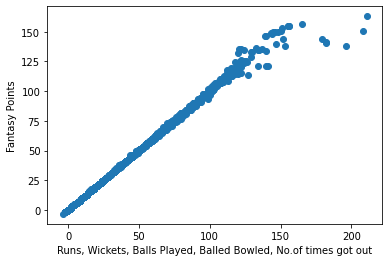

In [21]:
# prediction graph
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)
plt.ylabel("Fantasy Points")
plt.xlabel("Runs, Wickets, Balls Played, Balled Bowled, No.of times got out")
plt.show

In [22]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip available: 22.3 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import pickle

In [25]:
pickle.dump(rf_random,open("fantasy_application.pkl","wb"))

In [26]:
pickle_model = pickle.load(open("fantasy_application.pkl","rb"))

In [27]:
ls = [1, 18, 17, 1, 22, 22]
output = pickle_model.predict([ls])
output[0]

c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


152.4014169505631

In [42]:
df_pre_rec = pd.read_csv('players_previous_record.csv')

In [43]:
df_pre_rec

,id,players,calc_balls_played,calc_runs,is_wicket,calc_balls_bowled,calc_wickets_taken
0,0,A Ashish Reddy,18,18,0,20,1
1,1,A Chandila,2,4,0,28,1
2,2,A Chopra,6,10,0,0,0
3,3,A Choudhary,10,12,0,37,1
4,4,A Dananjaya,0,0,0,0,0
...,...,...,...,...,...,...,...
575,575,SS Mundhe,0,0,0,2,0
576,576,SS Sarkar,0,0,0,45,1
577,577,T Shamsi,0,0,0,117,2
578,578,TP Sudhindra,0,0,0,696,6


In [57]:
df_pre_rec['fantasy_points'] = 0

In [58]:
for i in df_pre_rec.index:
    temp_id = df_pre_rec['id'][i]
    temp_balls_played = df_pre_rec['calc_balls_played'][i]
    temp_runs = df_pre_rec['calc_runs'][i]
    temp_is_wicket = df_pre_rec['is_wicket'][i]
    temp_balls_bowled = df_pre_rec['calc_balls_bowled'][i]
    temp_wicket_taken = df_pre_rec['calc_wickets_taken'][i]
    ls = [temp_id, temp_balls_played, temp_runs, temp_is_wicket, temp_balls_bowled, temp_wicket_taken]
    print(ls)
    df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])

[0, 18, 18, 0, 20, 1]
[1, 2, 4, 0, 28, 1]


c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

[2, 6, 10, 0, 0, 0]
[3, 10, 12, 0, 37, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[4, 0, 0, 0, 0, 0]
[5, 19, 31, 0, 93, 2]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[6, 7, 17, 0, 26, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[7, 6, 12, 0, 28, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[8, 4, 6, 0, 130, 2]
[9, 7, 9, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[10, 1, 5, 0, 20, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[11, 4, 7, 0, 25, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[12, 0, 0, 0, 18, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[13, 32, 37, 0, 42, 1]
[14, 2, 4, 0, 15, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[15, 0, 2, 0, 13, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[16, 6, 13, 0, 0, 0]
[17, 11, 12, 0, 88, 2]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[18, 10, 15, 0, 552, 5]
[19, 3, 9, 0, 43, 2]
[20, 17, 22, 0, 58, 1]


c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

[21, 10, 21, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[22, 0, 2, 0, 28, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[23, 19, 24, 0, 16, 1]
[24, 43, 42, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[25, 13, 17, 0, 0, 0]
[26, 23, 27, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[27, 5, 10, 0, 31, 1]
[28, 28, 30, 0, 294, 3]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[29, 19, 24, 0, 0, 0]
[30, 4, 7, 0, 17, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[31, 18, 23, 0, 72, 2]
[32, 6, 9, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[33, 34, 30, 0, 26, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[34, 0, 2, 0, 56, 2]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[35, 4, 10, 0, 39, 1]
[36, 4, 9, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[37, 21, 25, 0, 195, 3]
[38, 0, 1, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[39, 8, 11, 0, 15, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[40, 14, 18, 0, 110, 2]
[41, 13, 17, 0, 64, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[42, 24, 31, 0, 1, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[43, 24, 36, 0, 47, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[44, 2, 3, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[45, 13, 17, 0, 17, 1]
[46, 13, 21, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[47, 11, 14, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[48, 0, 0, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[49, 13, 17, 0, 41, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[50, 0, 0, 0, 9, 1]
[51, 2, 6, 0, 48, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[52, 12, 17, 0, 0, 0]
[53, 7, 7, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[54, 14, 16, 0, 0, 0]
[55, 22, 29, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[56, 6, 7, 0, 0, 0]
[57, 21, 22, 0, 296, 4]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[58, 0, 0, 0, 0, 0]
[59, 18, 17, 0, 66, 2]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[60, 9, 15, 0, 0, 0]
[61, 11, 12, 0, 72, 2]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[62, 2, 3, 0, 69, 2]
[63, 3, 9, 0, 36, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[64, 0, 0, 0, 21, 1]
[65, 0, 0, 0, 150, 2]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[66, 17, 20, 0, 25, 1]
[67, 8, 10, 0, 55, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[68, 12, 17, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[69, 3, 7, 0, 27, 1]
[70, 0, 2, 0, 30, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[71, 9, 12, 0, 65, 2]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[72, 0, 0, 0, 33, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[73, 20, 35, 0, 0, 0]
[74, 0, 0, 0, 48, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[75, 19, 24, 0, 43, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[76, 0, 1, 0, 53, 1]
[77, 24, 27, 0, 0, 0]


c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[78, 24, 25, 0, 0, 0]
[79, 4, 10, 0, 63, 2]
[80, 24, 21, 0, 54, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[81, 0, 1, 0, 20, 1]
[82, 29, 18, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[83, 24, 30, 0, 13, 1]
[84, 27, 32, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[85, 3, 7, 0, 72, 2]
[86, 8, 13, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])


[87, 10, 16, 0, 43, 1]
[88, 29, 31, 0, 30, 1]
[89, 10, 15, 0, 0, 0]


c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

[90, 16, 19, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[91, 0, 0, 0, 57, 1]
[92, 15, 20, 0, 80, 2]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[93, 11, 17, 0, 0, 0]
[94, 29, 34, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[95, 13, 21, 0, 0, 0]
[96, 40, 41, 0, 73, 2]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[97, 22, 22, 0, 22, 1]
[98, 20, 24, 0, 49, 2]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[99, 8, 16, 0, 0, 0]
[100, 4, 8, 0, 23, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[101, 4, 8, 0, 150, 2]
[102, 2, 5, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[103, 1, 4, 0, 9, 1]
[104, 24, 27, 0, 280, 4]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[105, 12, 18, 0, 0, 0]
[106, 14, 12, 0, 26, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])


[107, 8, 12, 0, 18, 1]


c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])


[108, 2, 4, 0, 13, 1]
[109, 1, 5, 0, 27, 1]


c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])


[110, 1, 3, 0, 81, 2]
[111, 30, 33, 0, 0, 0]


c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

[112, 38, 33, 0, 217, 3]
[113, 19, 25, 0, 23, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])


[114, 7, 10, 0, 9, 1]
[115, 29, 34, 0, 0, 0]


c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

[116, 38, 41, 0, 0, 0]
[117, 0, 0, 0, 3, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[118, 20, 25, 0, 0, 0]
[119, 14, 18, 0, 35, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[120, 18, 21, 0, 15, 1]
[121, 16, 18, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[122, 18, 22, 0, 21, 1]
[123, 27, 37, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[124, 13, 17, 0, 84, 2]
[125, 21, 26, 0, 82, 2]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[126, 9, 13, 0, 0, 0]
[127, 0, 1, 0, 37, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[128, 8, 13, 0, 11, 1]
[129, 17, 19, 0, 30, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[130, 13, 16, 0, 34, 1]
[131, 7, 11, 0, 35, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[132, 11, 17, 0, 36, 1]
[133, 0, 0, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])


[134, 7, 11, 0, 96, 2]


c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[135, 0, 4, 0, 21, 1]
[136, 0, 0, 0, 117, 2]
[137, 21, 28, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[138, 6, 9, 0, 0, 0]
[139, 0, 0, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[140, 1, 6, 0, 0, 0]
[141, 25, 29, 0, 36, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[142, 5, 11, 0, 33, 1]
[143, 4, 9, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[144, 16, 18, 0, 45, 1]
[145, 6, 13, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[146, 4, 7, 0, 33, 1]
[147, 24, 26, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[148, 21, 25, 0, 0, 0]
[149, 19, 12, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])


[150, 4, 7, 0, 0, 0]
[151, 27, 34, 0, 0, 0]
[152, 3, 4, 0, 46, 1]


c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

[153, 17, 20, 0, 15, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[154, 22, 31, 0, 0, 0]
[155, 5, 11, 0, 27, 1]
[156, 16, 24, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[157, 0, 1, 0, 32, 1]
[158, 1, 4, 0, 36, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[159, 7, 14, 0, 124, 2]
[160, 18, 22, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[161, 21, 21, 0, 65, 2]
[162, 13, 15, 0, 56, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[163, 14, 18, 0, 22, 1]
[164, 0, 2, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[165, 9, 13, 0, 0, 0]
[166, 0, 0, 0, 52, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[167, 18, 27, 0, 0, 0]
[168, 29, 28, 0, 36, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[169, 45, 44, 0, 0, 0]
[170, 10, 11, 0, 33, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[171, 12, 14, 0, 33, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[172, 9, 9, 0, 25, 1]
[173, 0, 0, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[174, 6, 10, 0, 0, 0]
[175, 0, 0, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[176, 3, 7, 0, 64, 2]
[177, 5, 5, 0, 52, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[178, 0, 0, 0, 49, 1]
[179, 16, 21, 0, 33, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[180, 9, 15, 0, 0, 0]
[181, 1, 3, 0, 28, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[182, 4, 8, 0, 19, 1]
[183, 48, 88, 0, 33, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[184, 27, 30, 0, 0, 0]
[185, 3, 7, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[186, 12, 18, 0, 51, 1]
[187, 16, 27, 0, 47, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[188, 7, 14, 0, 29, 1]
[189, 2, 5, 0, 35, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[190, 0, 0, 0, 108, 2]
[191, 22, 24, 0, 30, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[192, 14, 15, 0, 21, 1]
[193, 30, 35, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[194, 16, 20, 0, 40, 1]
[195, 5, 8, 0, 32, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[196, 11, 13, 0, 34, 1]
[197, 6, 12, 0, 250, 3]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[198, 0, 0, 0, 32, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[199, 17, 29, 0, 21, 1]
[200, 17, 27, 0, 43, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[201, 5, 10, 0, 25, 1]
[202, 26, 29, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[203, 4, 9, 0, 46, 2]
[204, 0, 0, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[205, 17, 15, 0, 41, 1]
[206, 33, 39, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[207, 6, 13, 0, 17, 1]
[208, 9, 14, 0, 23, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[209, 36, 41, 0, 66, 2]
[210, 16, 19, 0, 25, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[211, 10, 8, 0, 72, 2]
[212, 19, 24, 0, 60, 2]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[213, 17, 19, 0, 0, 0]
[214, 1, 4, 0, 24, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[215, 6, 9, 0, 44, 1]
[216, 9, 15, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[217, 13, 14, 0, 70, 2]
[218, 6, 13, 0, 13, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])


[219, 0, 0, 0, 0, 0]
[220, 28, 28, 0, 35, 1]
[221, 5, 10, 0, 0, 0]


c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

[222, 6, 10, 0, 0, 0]
[223, 5, 8, 0, 70, 2]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[224, 20, 24, 0, 0, 0]
[225, 21, 25, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[226, 25, 26, 0, 50, 1]
[227, 18, 13, 0, 300, 4]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])


[228, 0, 0, 0, 17, 1]


c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[229, 12, 12, 0, 21, 1]
[230, 19, 23, 0, 0, 0]
[231, 3, 7, 0, 100, 2]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[232, 36, 42, 0, 0, 0]
[233, 17, 22, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[234, 2, 4, 0, 25, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[235, 0, 0, 0, 20, 1]
[236, 0, 2, 0, 32, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[237, 27, 34, 0, 22, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[238, 35, 39, 0, 0, 0]
[239, 10, 15, 0, 30, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[240, 7, 12, 0, 20, 1]
[241, 32, 32, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[242, 0, 3, 0, 12, 1]
[243, 4, 12, 0, 19, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[244, 1, 4, 0, 43, 2]
[245, 6, 14, 0, 36, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[246, 0, 0, 0, 6, 1]
[247, 2, 5, 0, 28, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[248, 7, 11, 0, 0, 0]
[249, 17, 27, 0, 2, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[250, 19, 27, 0, 0, 0]
[251, 0, 1, 0, 157, 2]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[252, 64, 44, 0, 51, 1]
[253, 30, 26, 0, 142, 3]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[254, 34, 39, 0, 51, 1]
[255, 19, 20, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[256, 10, 13, 0, 29, 1]
[257, 17, 24, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[258, 19, 23, 0, 0, 0]
[259, 1, 2, 0, 50, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[260, 9, 16, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[261, 12, 16, 0, 72, 2]
[262, 12, 18, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])


[263, 13, 21, 0, 0, 0]


c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[264, 5, 9, 0, 36, 1]
[265, 8, 11, 0, 26, 1]
[266, 1, 3, 0, 40, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[267, 4, 11, 0, 49, 1]
[268, 0, 3, 0, 68, 2]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[269, 4, 11, 0, 0, 0]
[270, 21, 27, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[271, 21, 24, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[272, 0, 1, 0, 40, 1]
[273, 17, 21, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[274, 8, 12, 0, 16, 1]
[275, 9, 16, 0, 16, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])


[276, 0, 1, 0, 0, 0]
[277, 26, 27, 0, 42, 1]
[278, 10, 17, 0, 0, 0]


c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

[279, 10, 15, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[280, 7, 7, 0, 0, 0]
[281, 33, 38, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[282, 16, 17, 0, 13, 1]
[283, 7, 11, 0, 34, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[284, 8, 16, 0, 26, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[285, 24, 22, 0, 0, 0]
[286, 24, 27, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[287, 4, 7, 0, 26, 1]
[288, 20, 32, 0, 23, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[289, 13, 17, 0, 0, 0]
[290, 22, 29, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[291, 20, 27, 0, 197, 3]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[292, 37, 41, 0, 0, 0]
[293, 29, 23, 0, 26, 1]
[294, 4, 7, 0, 21, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])


[295, 5, 8, 0, 27, 1]
[296, 8, 13, 0, 35, 1]


c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

[297, 53, 55, 0, 0, 0]
[298, 26, 27, 0, 36, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[299, 12, 17, 0, 18, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[300, 13, 21, 0, 0, 0]
[301, 33, 36, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[302, 9, 11, 0, 50, 1]
[303, 4, 7, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[304, 20, 26, 0, 0, 0]
[305, 17, 21, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[306, 0, 0, 0, 138, 2]
[307, 13, 13, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[308, 0, 2, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[309, 0, 1, 0, 47, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[310, 4, 8, 0, 60, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[311, 16, 16, 0, 54, 1]
[312, 2, 5, 0, 30, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[313, 5, 9, 0, 31, 1]
[314, 1, 3, 0, 44, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[315, 0, 1, 0, 32, 1]
[316, 8, 16, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])


[317, 30, 30, 0, 0, 0]
[318, 22, 27, 0, 18, 1]


c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[319, 7, 12, 0, 0, 0]
[320, 8, 14, 0, 85, 2]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[321, 0, 0, 0, 72, 2]
[322, 2, 6, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[323, 0, 0, 0, 0, 0]
[324, 5, 8, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[325, 15, 17, 0, 32, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[326, 8, 9, 0, 21, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[327, 3, 7, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[328, 16, 21, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[329, 12, 24, 0, 0, 0]
[330, 37, 38, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[331, 0, 1, 0, 25, 1]
[332, 5, 8, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[333, 6, 10, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[334, 0, 0, 0, 0, 0]
[335, 7, 10, 0, 51, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])


[336, 12, 14, 0, 31, 1]
[337, 0, 0, 0, 26, 1]
[338, 7, 19, 0, 0, 0]


c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

[339, 0, 0, 0, 119, 2]
[340, 4, 10, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[341, 16, 22, 0, 0, 0]
[342, 9, 16, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[343, 16, 22, 0, 41, 1]
[344, 48, 50, 0, 21, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[345, 15, 17, 0, 41, 1]
[346, 1, 3, 0, 36, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[347, 9, 14, 0, 0, 0]
[348, 0, 0, 0, 75, 2]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[349, 8, 11, 0, 30, 1]
[350, 0, 1, 0, 30, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[351, 21, 22, 0, 0, 0]
[352, 8, 11, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[353, 3, 6, 0, 0, 0]
[354, 4, 18, 0, 39, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[355, 0, 3, 0, 70, 2]
[356, 3, 8, 0, 196, 3]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])


[357, 27, 32, 0, 0, 0]
[358, 7, 11, 0, 33, 1]
[359, 8, 11, 0, 29, 1]


c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

[360, 5, 6, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[361, 15, 21, 0, 53, 1]
[362, 20, 28, 0, 0, 0]
[363, 12, 19, 0, 63, 2]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[364, 0, 3, 0, 10, 1]
[365, 18, 24, 0, 225, 3]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[366, 6, 10, 0, 26, 1]
[367, 11, 16, 0, 65, 2]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[368, 3, 6, 0, 36, 1]
[369, 4, 9, 0, 35, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[370, 21, 28, 0, 32, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[371, 7, 11, 0, 24, 1]
[372, 19, 24, 0, 37, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[373, 23, 26, 0, 0, 0]
[374, 7, 8, 0, 37, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[375, 40, 68, 0, 0, 0]
[376, 8, 13, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[377, 9, 13, 0, 22, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[378, 0, 0, 0, 160, 3]
[379, 25, 29, 0, 38, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[380, 5, 9, 0, 24, 1]
[381, 6, 10, 0, 15, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[382, 8, 14, 0, 0, 0]
[383, 0, 3, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[384, 7, 11, 0, 0, 0]
[385, 18, 19, 0, 53, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[386, 1, 3, 0, 27, 1]
[387, 0, 0, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[388, 33, 35, 0, 0, 0]
[389, 19, 22, 0, 63, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[390, 16, 20, 0, 38, 1]
[391, 4, 8, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[392, 11, 24, 0, 0, 0]
[393, 21, 27, 0, 23, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[394, 0, 2, 0, 0, 0]
[395, 0, 0, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[396, 5, 11, 0, 0, 0]
[397, 6, 7, 0, 21, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[398, 21, 27, 0, 0, 0]
[399, 7, 8, 0, 22, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[400, 0, 0, 0, 0, 0]
[401, 2, 7, 0, 37, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[402, 16, 17, 0, 0, 0]
[403, 11, 19, 0, 22, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[404, 0, 2, 0, 40, 1]
[405, 25, 30, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[406, 3, 8, 0, 0, 0]
[407, 29, 34, 0, 15, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])


[408, 13, 15, 0, 13, 1]
[409, 9, 13, 0, 25, 1]
[410, 1, 4, 0, 30, 1]


c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

[411, 0, 0, 0, 115, 2]
[412, 0, 0, 0, 62, 2]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[413, 0, 0, 0, 20, 1]
[414, 0, 2, 0, 47, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[415, 8, 9, 0, 34, 1]
[416, 14, 18, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[417, 0, 2, 0, 44, 1]
[418, 16, 20, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[419, 4, 11, 0, 36, 1]
[420, 6, 15, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[421, 0, 0, 0, 123, 2]
[422, 17, 18, 0, 24, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[423, 13, 15, 0, 0, 0]
[424, 18, 22, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[425, 28, 31, 0, 0, 0]
[426, 4, 8, 0, 62, 2]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[427, 13, 14, 0, 44, 1]
[428, 0, 3, 0, 253, 3]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[429, 10, 18, 0, 46, 1]
[430, 0, 1, 0, 34, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[431, 16, 24, 0, 48, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[432, 11, 14, 0, 32, 1]
[433, 8, 15, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[434, 0, 1, 0, 32, 1]
[435, 34, 38, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[436, 11, 14, 0, 130, 2]
[437, 4, 5, 0, 37, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[438, 30, 33, 0, 79, 2]
[439, 2, 5, 0, 35, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[440, 5, 10, 0, 28, 1]
[441, 3, 7, 0, 18, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[442, 25, 23, 0, 28, 1]
[443, 0, 0, 0, 36, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[444, 15, 24, 0, 0, 0]
[445, 16, 18, 0, 28, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[446, 4, 10, 0, 28, 1]
[447, 20, 22, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[448, 7, 9, 0, 29, 1]
[449, 19, 21, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[450, 14, 21, 0, 0, 0]
[451, 11, 14, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[452, 13, 19, 0, 0, 0]
[453, 18, 18, 0, 25, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[454, 25, 32, 0, 0, 0]
[455, 24, 32, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[456, 25, 30, 0, 29, 1]
[457, 0, 0, 0, 39, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[458, 25, 30, 0, 0, 0]
[459, 0, 0, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[460, 22, 28, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[461, 24, 26, 0, 31, 1]
[462, 16, 20, 0, 35, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])


[463, 22, 28, 0, 0, 0]
[464, 16, 17, 0, 0, 0]


c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

[465, 4, 7, 0, 34, 1]
[466, 13, 15, 0, 0, 0]
[467, 25, 27, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[468, 3, 8, 0, 25, 1]
[469, 0, 0, 0, 28, 1]
[470, 11, 10, 0, 32, 1]


c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

[471, 18, 21, 0, 30, 1]
[472, 1, 4, 0, 38, 1]
[473, 8, 5, 0, 68, 2]
[474, 0, 0, 0, 41, 1]
[475, 0, 2, 0, 8, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[476, 9, 13, 0, 91, 2]
[477, 29, 34, 0, 0, 0]
[478, 9, 12, 0, 7, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[479, 0, 0, 0, 0, 0]
[480, 8, 10, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[481, 2, 4, 0, 345, 4]
[482, 4, 9, 0, 0, 0]
[483, 3, 11, 0, 82, 2]
[484, 1, 3, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[485, 0, 0, 0, 39, 1]
[486, 11, 10, 0, 0, 0]
[487, 2, 6, 0, 14, 1]
[488, 1, 4, 0, 25, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[489, 1, 5, 0, 0, 0]
[490, 17, 19, 0, 65, 2]
[491, 16, 26, 0, 42, 2]
[492, 15, 22, 0, 34, 1]
[493, 20, 28, 0, 216, 3]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[494, 37, 34, 0, 34, 1]
[495, 3, 8, 0, 0, 0]
[496, 12, 15, 0, 0, 0]
[497, 0, 2, 0, 44, 1]
[498, 18, 21, 0, 133, 3]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[499, 0, 0, 0, 0, 0]
[500, 1, 7, 0, 0, 0]
[501, 9, 15, 0, 0, 0]
[502, 16, 25, 0, 0, 0]
[503, 4, 8, 0, 28, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[504, 15, 13, 0, 9, 1]
[505, 31, 36, 0, 210, 3]
[506, 0, 0, 0, 30, 1]
[507, 26, 27, 0, 54, 2]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[508, 25, 31, 0, 45, 1]
[509, 15, 14, 0, 0, 0]
[510, 5, 12, 0, 43, 1]
[511, 4, 4, 0, 48, 1]
[512, 5, 7, 0, 90, 2]
[513, 1, 2, 0, 0, 0]
[514, 12, 17, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[515, 2, 7, 0, 20, 1]
[516, 4, 6, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[517, 11, 18, 0, 0, 0]
[518, 6, 11, 0, 23, 1]
[519, 4, 7, 0, 28, 1]
[520, 23, 25, 0, 0, 0]
[521, 10, 11, 0, 15, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[522, 11, 15, 0, 46, 1]
[523, 5, 10, 0, 0, 0]
[524, 9, 19, 0, 0, 0]
[525, 14, 19, 0, 34, 1]
[526, 0, 0, 0, 157, 2]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[527, 17, 23, 0, 88, 2]
[528, 0, 0, 0, 18, 1]
[529, 6, 13, 0, 0, 0]
[530, 24, 28, 0, 46, 1]
[531, 0, 4, 0, 25, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[532, 14, 24, 0, 0, 0]
[533, 4, 11, 0, 0, 0]
[534, 0, 3, 0, 0, 0]
[535, 20, 25, 0, 37, 1]
[536, 3, 7, 0, 27, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[537, 0, 0, 0, 46, 1]
[538, 0, 0, 0, 11, 1]
[539, 0, 0, 0, 39, 1]
[540, 0, 0, 0, 14, 0]
[541, 0, 0, 0, 22, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[542, 0, 0, 0, 45, 2]
[543, 0, 0, 0, 23, 1]
[544, 0, 0, 0, 0, 0]
[545, 0, 0, 0, 0, 0]
[546, 0, 0, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[547, 0, 0, 0, 86, 2]
[548, 0, 0, 0, 172, 4]
[549, 0, 0, 0, 70, 2]
[550, 0, 0, 0, 71, 1]
[551, 0, 0, 0, 51, 1]
[552, 0, 0, 0, 291, 3]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[553, 0, 0, 0, 32, 1]
[554, 0, 0, 0, 95, 2]
[555, 0, 0, 0, 32, 1]
[556, 0, 0, 0, 26, 1]
[557, 0, 0, 0, 8, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[558, 0, 0, 0, 0, 0]
[559, 0, 0, 0, 0, 0]
[560, 0, 0, 0, 45, 1]
[561, 0, 0, 0, 0, 0]
[562, 0, 0, 0, 19, 1]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[563, 0, 0, 0, 9, 1]
[564, 0, 0, 0, 44, 1]
[565, 0, 0, 0, 0, 0]
[566, 0, 0, 0, 311, 3]
[567, 0, 0, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[568, 0, 0, 0, 0, 0]
[569, 0, 0, 0, 0, 0]
[570, 0, 0, 0, 0, 0]
[571, 0, 0, 0, 178, 2]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

[572, 0, 0, 0, 54, 1]
[573, 0, 0, 0, 15, 1]
[574, 0, 0, 0, 42, 2]
[575, 0, 0, 0, 2, 0]
[576, 0, 0, 0, 45, 1]
[577, 0, 0, 0, 117, 2]
[578, 0, 0, 0, 696, 6]
[579, 0, 0, 0, 0, 0]


C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Temp/ipykernel_8264/1251425774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_rec['fantasy_points'][i] = pickle_model.predict([ls])
c:\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, b

In [60]:
df_pre_rec.to_csv("final_fantasy_points_2008_20.csv")